# **Feature Importance**

Feature importance refers to a technique used to determine the **contribution of each feature (or attribute) in the dataset to the predictive performance** of a machine learning model.

Feature importance values indicate the **relative importance of each feature but do not directly specify which features should be included or excluded** from the model.

**Key Difference:**

**Purpose:** Feature importance aims to understand the **contribution of each feature to the model's predictions**, while feature selection focuses on **choosing a subset of features to optimize model performance.**

In [24]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. Feature {indices[f]} ({iris.feature_names[indices[f]]}): {importances[indices[f]]}")


Feature ranking:
1. Feature 2 (petal length (cm)): 0.4361295069034437
2. Feature 3 (petal width (cm)): 0.43606478004168353
3. Feature 0 (sepal length (cm)): 0.10612761987750428
4. Feature 1 (sepal width (cm)): 0.02167809317736852


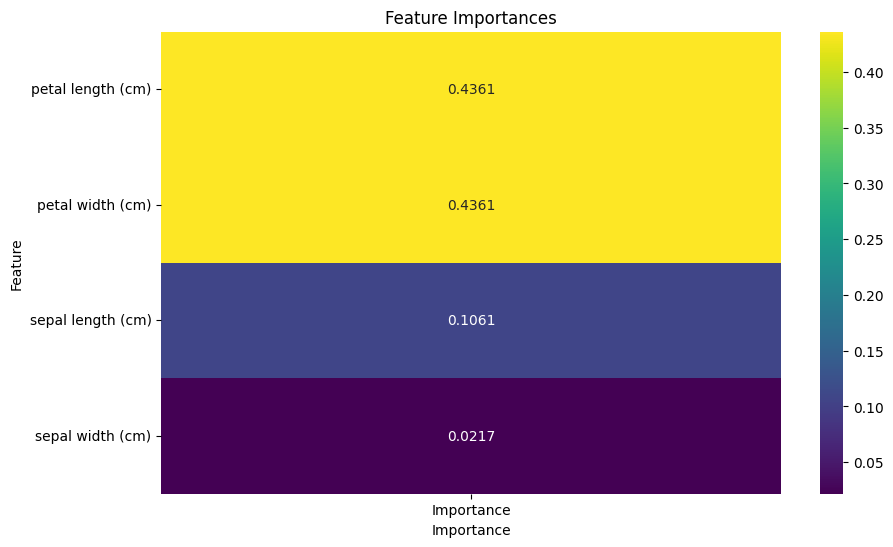

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=feature_importance_df.set_index('Feature'), annot=True, cmap='viridis', fmt='.4f')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**It can be clearly seen that the 'petal length', 'petal width', and 'sepal length' are more involed in making the predictions.**

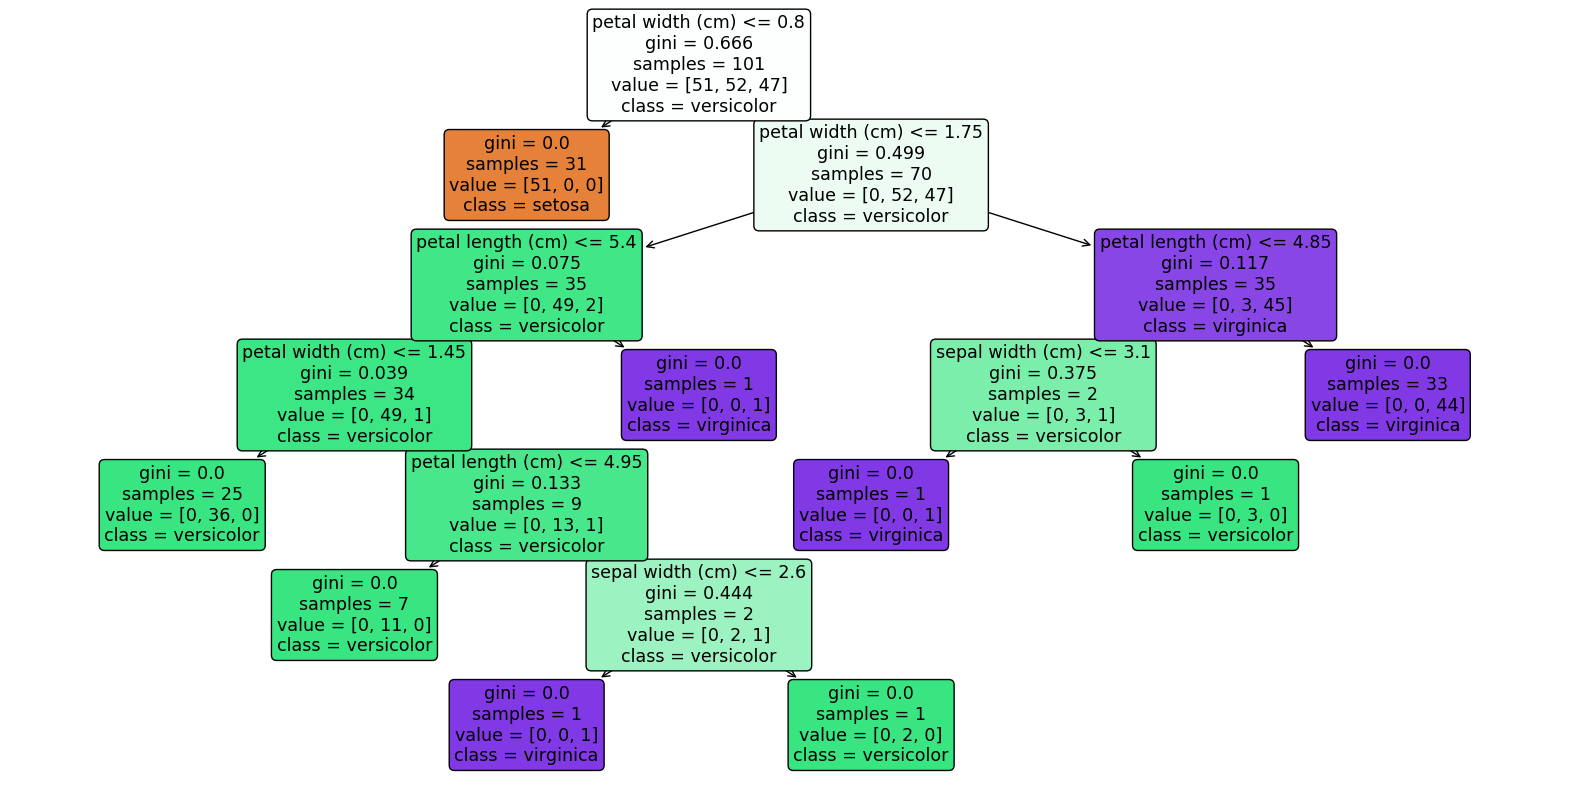

In [26]:
from sklearn.tree import plot_tree

# Extract one of the decision trees from the Random Forest (e.g., the first one)
tree = rf_classifier.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# **Feature Selection**

# **Filter Based Techniques**

**Filter Methods:**

**What are they?** Filter methods evaluate each feature individually based on some statistical properties like correlation or mutual information with the target variable.

**How do they work?** They don't involve the machine learning algorithm itself. Instead, they look at the characteristics of each feature to decide its importance or relevance.

**Example:** Imagine you have a dataset with features like age, income, and education level, and you want to predict if a person will buy a product. Filter methods would look at each feature (like age) and see how much it correlates with the target (buying the product) without considering other features.

In [13]:
# necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading the data
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
# Check for duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate Columns:", duplicate_columns)

Duplicate Columns: Index([], dtype='object')


no duplicate columns are there!

In [16]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


no duplicate rows are there!

# **Using Univariate Selection Technique (Chi2)**

Univariate selection is a feature selection technique used in machine learning and statistics to select the most important features from a dataset based on univariate statistical tests. In univariate selection, each feature is considered independently of the other features, and its importance is assessed based on its relationship with the target variable.

In [17]:
X = df.iloc[:,:-1]
y = df['price_range']

In [18]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [19]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

# apply SelectKBest
selected_features = SelectKBest(chi2, k = 20)
selected_total_features = selected_features.fit(X, y)

In [21]:
selected_total_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [22]:
df_selected_total_features = pd.DataFrame(selected_total_features.scores_, columns = ['Scores'])
col_names = pd.DataFrame(X.columns, columns = ['Features'])

df_concatenated = pd.concat([col_names, df_selected_total_features], axis = 1)


df_concatenated_sort = df_concatenated.sort_values(by = 'Scores', ascending = False)
df_concatenated_sort

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


**HIGHER THE VALUES, MORE IMP. THE FEATURE IS!**

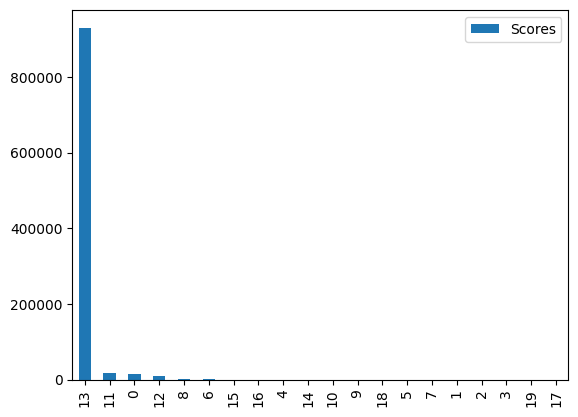

In [23]:
df_concatenated_sort.plot(kind = 'bar')
plt.show()

Not suitable for Numerical Features unless they are discretized, which can result in the loss of information.

# **Using Feature Importance Technique**

This technique gives us the score for each feature, higher score indicates more relevant feature!

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [25]:
print(model.feature_importances_)

[0.06205129 0.01972353 0.03421224 0.01978271 0.03388922 0.01788551
 0.03570389 0.03392964 0.03680153 0.03370228 0.0346301  0.04623435
 0.04761974 0.38395638 0.0347627  0.0354248  0.03601119 0.01460042
 0.0183403  0.02073818]


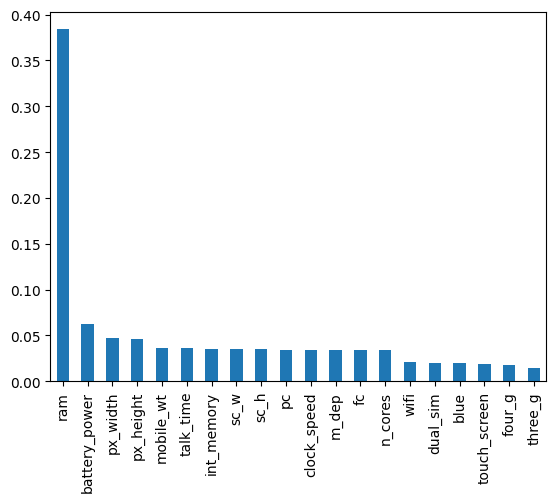

In [26]:
series_form = pd.Series(model.feature_importances_, index = X.columns)
series_form_sorted = series_form.sort_values(ascending = False)

series_form_sorted.plot(kind = 'bar')
plt.show()

# **Using Correlation Technique**

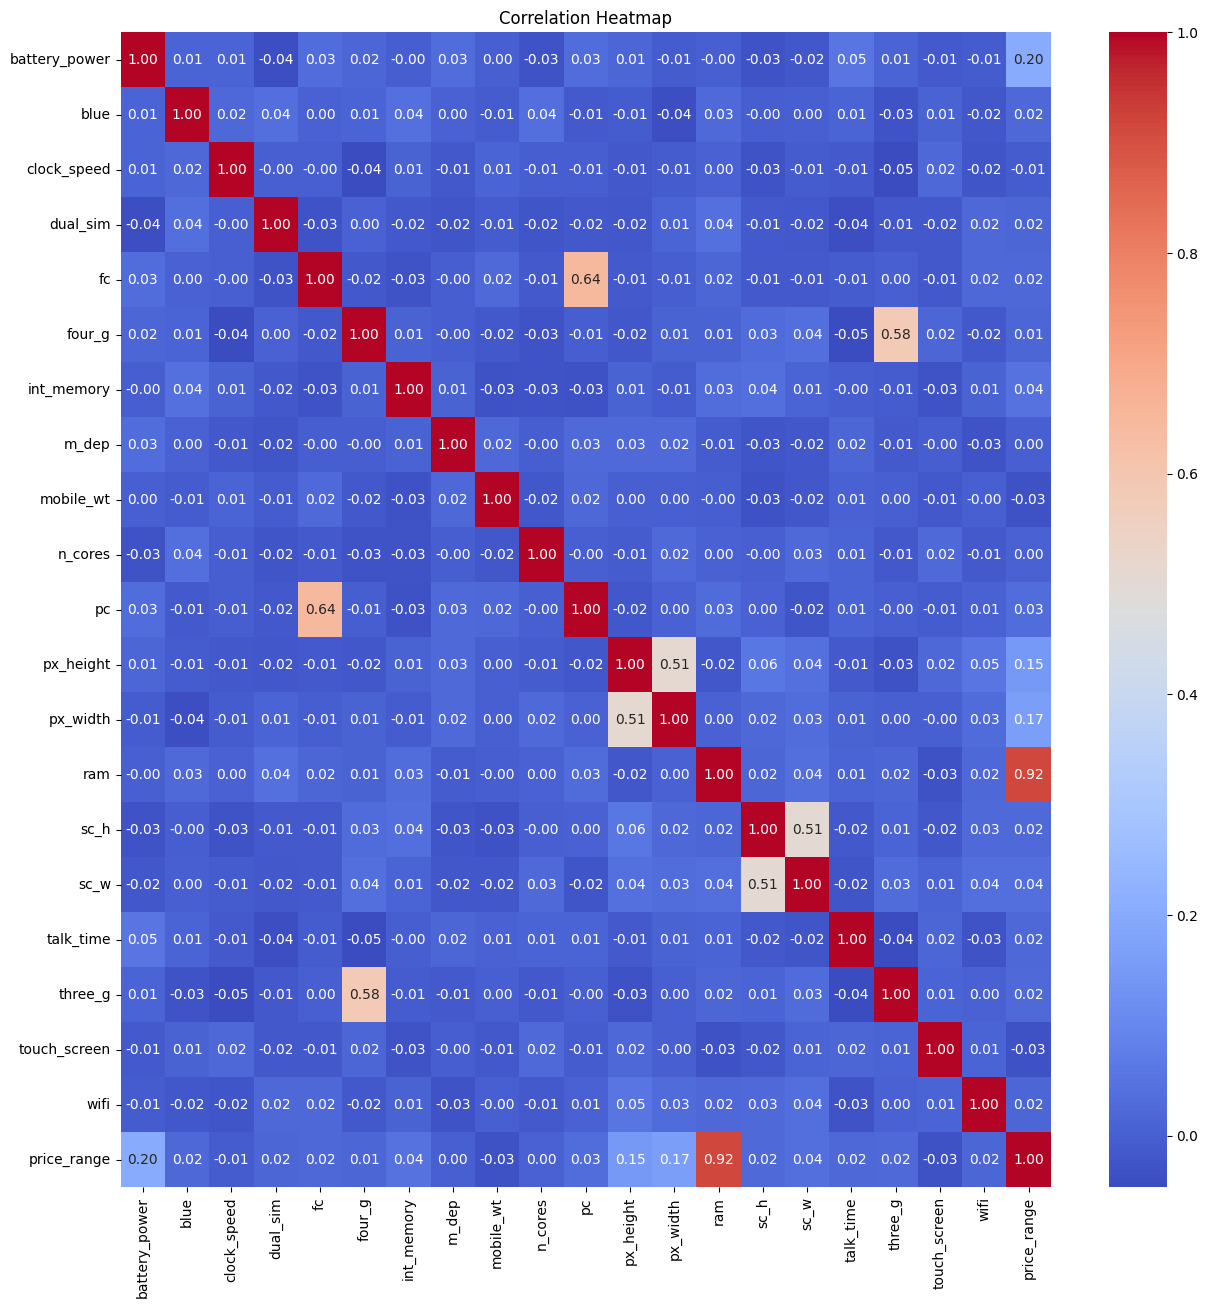

In [27]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Above is the correaltion matrix of whole dataset including the **DEPENDENT FEATURE**. But while dropping the features more than the **threshold**, we should not use **DEPENDENT FEATURE!** we should only use our **INDEPENDENT FEATURES NOT THE DEPENDENT FEATURE.**

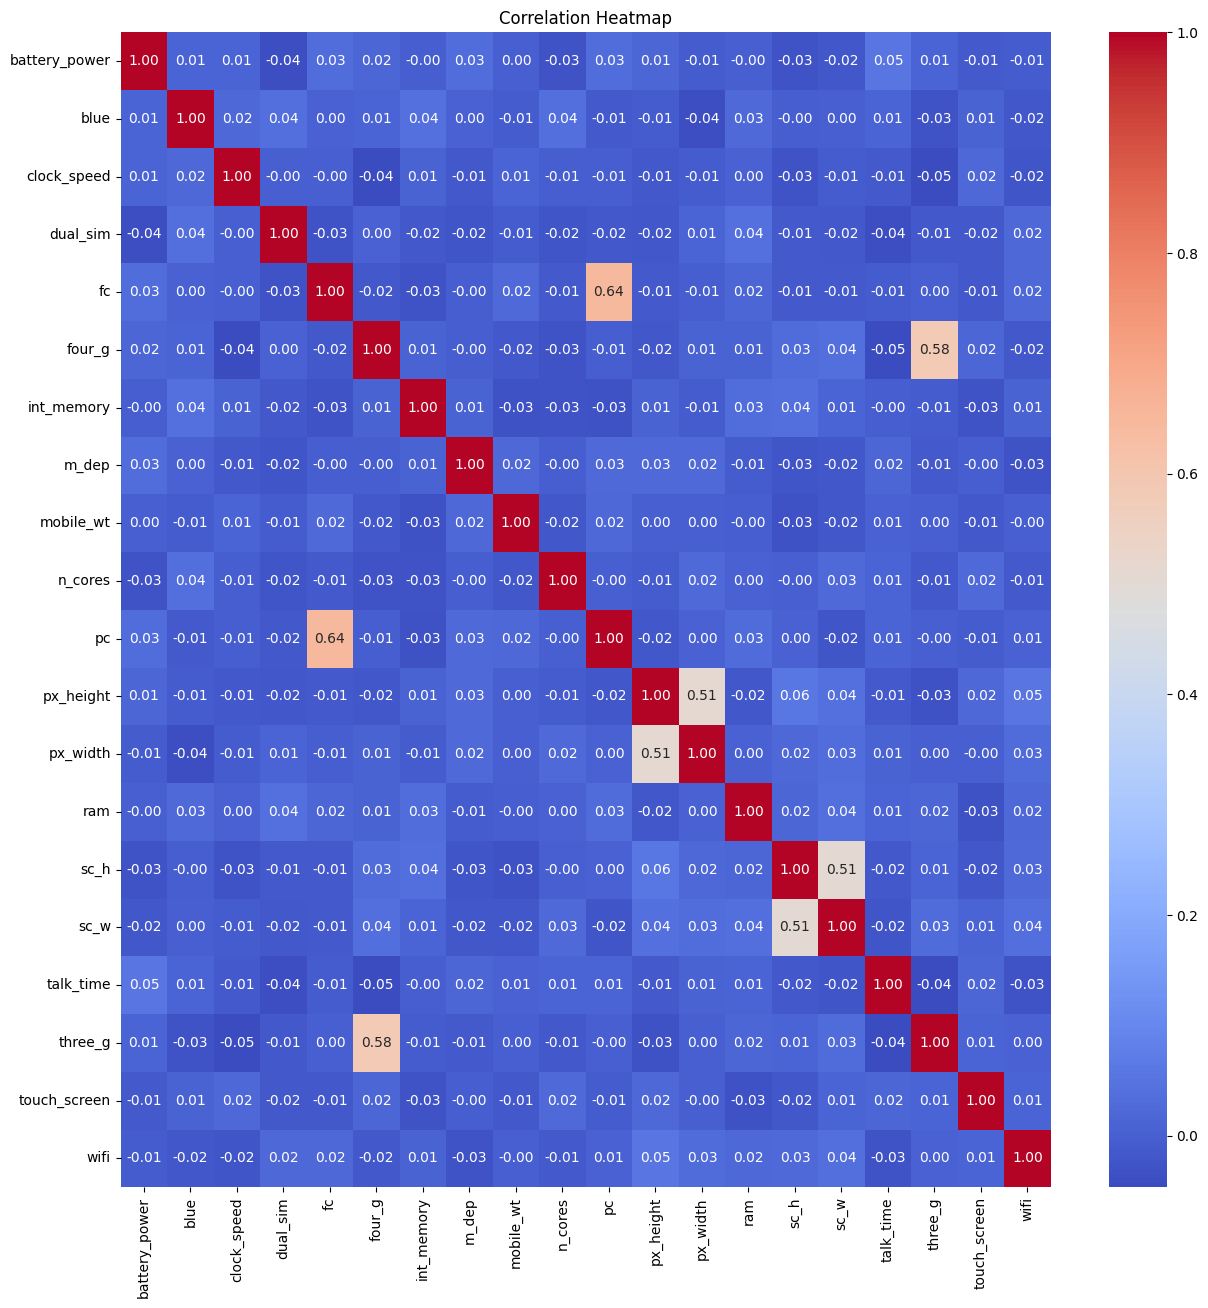

In [28]:
# Correlation matrix without DEPENDENT FEATURE

correlation_matrix = df.iloc[:, :-1].corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

**That's how we should pass our dataframe to our method.**

In [29]:
def correlation(dataset, threshold):
   col_corr = set() # Set of all the names of correlated columns

   corr_matrix = dataset.corr()
   for i in range(len(corr_matrix.columns)):
       for j in range(i):
         if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
           colname = corr_matrix.columns[i]  #getting the name of column
           col_corr.add(colname)
   return col_corr

we can further extend it, lets say we have two features which are highly correlated but which one to drop? we can keep that one that is more correlated with out target feature and drop the less correlated one!

In [30]:
# calling the function

threshold = 0.80
# Dropping the dependent feature
correlation(df.iloc[:, :-1], threshold)

set()

**No feature correlated more than 80%**

# **Using Variance Threshold Technique**

**Ignores Target Variable:** Variance Threshold is a univariate method, meaning it
evaluates each feature independently and doesn't consider the relationship between
each feature and the target variable. This means it may keep irrelevant features that
have a high variance but no relationship with the target, or discard potentially useful
features that have a low variance but a strong relationship with the target.

**Ignores Feature Interactions:** Variance Threshold doesn't account for interactions
between features. A feature with a low variance may become very informative when
combined with another feature.

**Sensitive to Data Scaling:** Variance Threshold is sensitive to the scale of the data. If
features are not on the same scale, the variance will naturally be higher for features
with larger values. Therefore, it is important to standardize the features before
applying Variance Threshold.

**Arbitrary Threshold Value:** It's up to the user to define what constitutes a "low"
variance. The threshold is not always easy to define and the optimal value can vary
between datasets.

Note: its good to Scale Down the data before applying it.

Threshold: its good to set a threshold between 0.1 to 0.01

In [31]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.05)

# Fit the training data
sel.fit_transform(X_train)

sum(sel.get_support())



20

In [33]:
columns = X_train.columns[sel.get_support()]
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [34]:
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

# **Using ANOVA Technique**

In [35]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [36]:
columns = X_train.columns[sel.get_support()]

In [37]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [38]:
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


**NOTE: we can apply cross validation to find the optimal k by fitting models.**

# **Using Information Gain Techniques**

# **Using Mutual Information Classification Technique**

It estimates mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

**Helps to identify which features provide the most information about the target variable in both classification and regression contexts.** They are particularly valuable because of their ability to capture non-linear dependencies that other correlation-based methods might miss.


**Applying classif because the price_range is [1, 2, 3, 0]**

In [39]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_c = mutual_info_classif(X, y)

In [40]:
mutual_info_classif_series = pd.Series(mutual_info_c, index = X.columns)
mutual_info_classif_series.sort_values(ascending = False)

ram              0.845019
wifi             0.036309
px_width         0.030949
px_height        0.028616
battery_power    0.026989
dual_sim         0.020304
blue             0.016999
int_memory       0.015358
mobile_wt        0.011498
fc               0.008621
four_g           0.008407
clock_speed      0.002205
sc_h             0.001606
sc_w             0.000591
m_dep            0.000000
n_cores          0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
pc               0.000000
dtype: float64

# **Wrapper Methods**

**What are they?** Wrapper methods select subsets of features and train a model using each subset to see how well it performs.

**How do they work?** They use the actual machine learning algorithm to evaluate feature subsets. They try different combinations of features to find the best one based on the model's performance.

**Example:** Using the same dataset as before, wrapper methods would try different combinations of features (like age + income, age + education, income + education, etc.) and train a model for each combination to see which combination gives the best prediction accuracy.

# **Exhaustive Feature Selection/Best Subset Selection**

**Advantages:**

**Optimality:** Exhaustive feature selection guarantees finding the best subset of features according to a specified criterion (e.g., performance metric like accuracy or cross-validated score).

**Thoroughness:** It explores all possible feature combinations within the given feature space, leaving no potential subset unexamined.


---


**Disadvantages:**

**Computational Complexity:** The main drawback of exhaustive feature selection is its computational cost. As the number of features increases, the number of combinations grows exponentially, making it computationally expensive and impractical for datasets with a large number of features. **Number of combinations to check is 2^n-1, means this number of times the model will be trained.**

**Evaluation Criterion:** If the evaluation criterion used to select the best subset of features is based solely on performance on the training data, **without considering the model's generalization ability on unseen data**, it may lead to overfitting.

**For example,** if you use the training dataset to evaluate all possible feature subsets and select the one with the best performance, it might choose a subset that fits the training data too closely, resulting in overfitting when applied to new, unseen data.


**NOTE: Use cross-validation to assess the generalization performance of the selected feature subset. Cross-validation helps estimate how well the model will perform on unseen data and can mitigate the risk of overfitting.**

***This is for Classification problem***

In [7]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

In [8]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()

sel = EFS(estimator=LogisticRegression(), min_features=1, max_features=4, scoring='accuracy', print_progress=True, cv=5)


In [18]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
X = iris.iloc[:, :-1]
y = iris['species']

modl = sel.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
modl.best_score_

0.9733333333333334

In [21]:
modl.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [22]:
metric_df = pd.DataFrame.from_dict(modl.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


<function matplotlib.pyplot.show(close=None, block=None)>

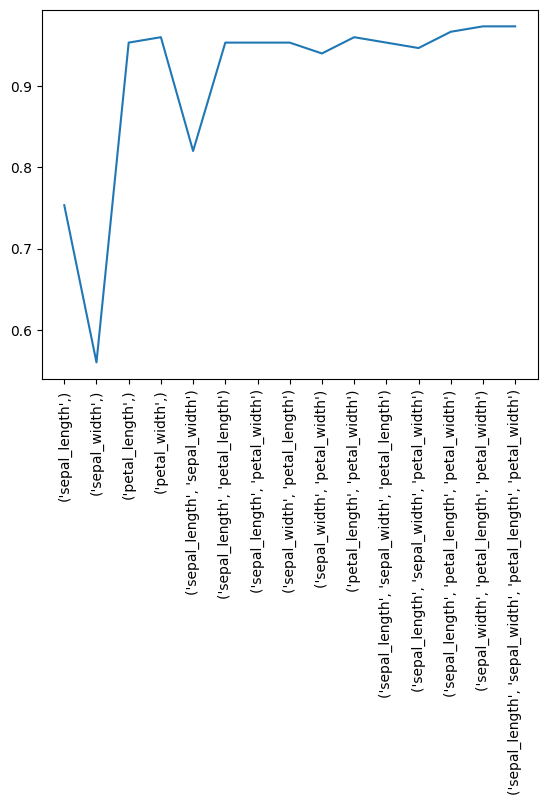

In [23]:
plt.plot([str(k) for k in metric_df[ 'feature_names' ]],metric_df[ 'avg_score' ])
plt.xticks(rotation=90)
plt.show

It can be seent that the 2nd last feature subset is good to go!

***This is for Regression problem***

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

In [51]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


Can be seen that model is getting overfitted!

In [54]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [55]:
sel.best_score_

0.6827988156800064

In [56]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [57]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919121, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182765, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549378, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675012, 0.03113193162308736, 0.0...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861512, 0.5762263847142651, 0.435...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752514, 0.5384374917854688, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8494627278072391, 0.5454006150975992, 0.444...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451423, 0.5448662375728608, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [58]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

Using adj. R2 now!

In [59]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

creating new adjusted r2 column

In [60]:
metric_df.sort_values('adjusted_r2',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
7975,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8855189158291968, 0.5742220049707852, 0.437...",0.682799,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.096995,0.130595,0.043532,404,10,0.674728
7408,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.8717831363927702, 0.5819307800982585, 0.462...",0.680483,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.090811,0.122269,0.040756,404,9,0.673185
8141,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8792702841985804, 0.5752245789381255, 0.438...",0.681125,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.096068,0.129348,0.043116,404,11,0.672177
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.8734082301119794, 0.5381382515761789, 0.461...",0.680994,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.098795,0.133019,0.04434,404,11,0.672043
8153,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8853169531726773, 0.5751761822045904, 0.434...",0.680914,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.097075,0.130703,0.043568,404,11,0.67196
...,...,...,...,...,...,...,...,...,...,...
53,"(3, 11)","[0.07227421305699011, -0.026141441832760126, 0...",0.073485,"(3, 11)",0.069934,0.09416,0.031387,404,2,0.068864
11,"(11,)","[0.1200629474726852, 0.03143835749752166, -0.0...",0.068712,"(11,)",0.071116,0.095752,0.031917,404,1,0.066396
49,"(3, 7)","[-0.0371219722713414, -0.1671760395427997, 0.0...",0.057453,"(3, 7)",0.09446,0.127183,0.042394,404,2,0.052752
7,"(7,)","[0.004822573124353857, -0.09518844023749029, -...",0.038815,"(7,)",0.066813,0.089958,0.029986,404,1,0.036424


In [61]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

transforming our sets according to the new best features


In [62]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


# **Sequential Backward Elimination/Selection**

**Advantages:**

**Computationally Efficient:** Compared to exhaustive search methods, such as exhaustive feature selection, SBFE is computationally more efficient since it evaluates a subset of feature combinations rather than all possible combinations.

**Formula--> n(n+1)/2**


---


**Disadvantages:**

**May Miss Optimal Subset:** SBFE relies on a greedy backward elimination strategy, which may lead to suboptimal feature subsets if the removal of a feature early in the process prevents the discovery of a better subset later on.


---


**When to Use SBFE:**

**High-Dimensional Datasets:** SBFE is particularly useful for datasets with a large number of features, where exhaustive search methods become computationally prohibitive.

**Handling Multicollinearity:** If multicollinearity is a concern in the dataset, SBFE can effectively identify and remove redundant features, leading to a more robust model.


---


**NOTE:** It does not try out each and every possible combinations of the features, so if you have lesser features and you think you can go with **EXHAUSTIVE** then use it, because it gurantees the best features!

**If we have large feaures and can't apply EXHAUSTIVE then we can apply lets say this technique to reduce the features and then can apply EXHAUSTIVE on it.**

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)



(404, 13)


In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Baseline Model
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [71]:

lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [72]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [73]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817177, 0.6920238509138776, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,404,13,0.692596
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695304, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,404,12,0.696781
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7547108925568492, 0.6959627893665097, 0.701...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,404,11,0.699918
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905562, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,404,9,0.69757
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,404,8,0.691605
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750724, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,404,7,0.686794
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,404,6,0.681258
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,404,5,0.677058
4,"(5, 7, 10, 12)","[0.7384743962575442, 0.6401188507668829, 0.587...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658,404,4,0.659161


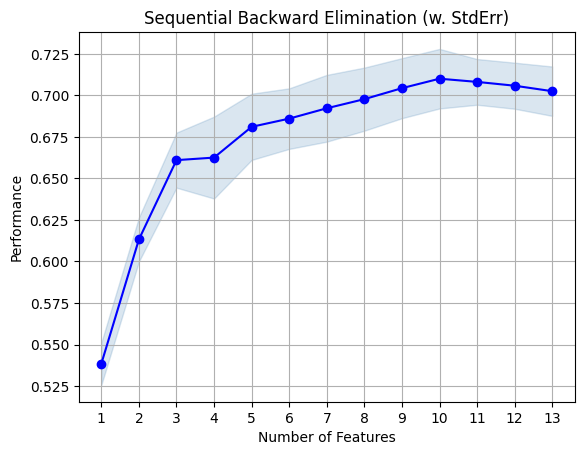

In [74]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [75]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


# **Forward Feature Selection**

**Advantages:**

**Efficient Exploration:** FFS explores the feature space incrementally, starting from an empty set of features and adding one feature at a time. This approach can be computationally more efficient than exhaustive search methods, especially for datasets with a large number of features.

**Formula--> n(n+1)/2**

**Handles Multicollinearity:** FFS can effectively handle multicollinearity by sequentially adding features based on their individual contributions, which can help identify and prioritize features that provide unique information to the model.


---


**Disadvantages:**

**May Overfit:** FFS's greedy forward selection strategy may lead to overfitting, especially if the addition of irrelevant features early in the process prevents the discovery of a better subset later on. So have to use a better metric like Adj.R2

**NOTE: can be applied similar to Backward by just using forward=False**


---

**When to choose Forward Vs Backward?**

Let's say i want to choose 90 faetures out of 100, so we can choose Backward, because it is eliminating the features and will reach faster to 90.

If i want to choose 10 features out of 100 then choose forward, it will select 10 faster than Backward because it is adding the features

If we want to select 50 out of 100, then choose anyone!




**Can be applied using this same code by just setting forward=True**

In [ ]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

**scikit learn also provides forward selection technique but has to set the required best features manually, can be applied using the below code:**

In [79]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS


sfs2 = SFS(model,
          #  cannot use 'Best'
           n_features_to_select=12,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)

In [80]:
np.arange(X.shape[1])[sfs2.support_]

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12])